In [20]:
# 安装必要的库（如果尚未安装，请取消注释并运行）
# !pip install yfinance pandas requests beautifulsoup4 selenium matplotlib

# 导入必要的库
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import os

# Helper function to create graphs
def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{stock_name} Stock Price", color="blue")
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label=f"{stock_name} Revenue", color="red")
    plt.title(f"{stock_name} Stock Price and Revenue")
    plt.xlabel("Date")
    plt.ylabel("Value (USD)")
    plt.legend()
    plt.grid()
    plt.show()

# Question 1: Extract Tesla Stock Data Using yfinance
print("=== Question 1: Extract Tesla Stock Data Using yfinance ===")
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data = tesla_data[['Date', 'Close']]
print("Tesla Stock Data (first five rows):")
print(tesla_data.head())  # Display first five rows



=== Question 1: Extract Tesla Stock Data Using yfinance ===
Tesla Stock Data (first five rows):
                       Date     Close
0 2010-06-29 00:00:00-04:00  1.592667
1 2010-06-30 00:00:00-04:00  1.588667
2 2010-07-01 00:00:00-04:00  1.464000
3 2010-07-02 00:00:00-04:00  1.280000
4 2010-07-06 00:00:00-04:00  1.074000


In [21]:
# Question 2: Extract Tesla Revenue Data Using Web Scraping with Selenium
print("\n=== Question 2: Extract Tesla Revenue Data Using Web Scraping ===")
# 设置 ChromeDriver 路径
chromedriver_path = "C:/Program Files/Google/chromedriver-win64/chromedriver.exe"  # 替换为你的 ChromeDriver 路径
if not os.path.exists(chromedriver_path):
    raise FileNotFoundError(f"ChromeDriver not found at {chromedriver_path}")

service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service)

# 打开 Tesla Revenue 页面
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url_tesla)

# 获取页面源代码并解析
html_data_tesla = driver.page_source
soup_tesla = BeautifulSoup(html_data_tesla, 'html.parser')

# 查找表格并提取数据
tables_tesla = soup_tesla.find_all('table')
print(f"Number of tables found: {len(tables_tesla)}")  # Debugging check

if len(tables_tesla) == 0:
    raise ValueError("No tables found on the Tesla revenue page. Please check the webpage structure.")

# 尝试找到正确的表格
tesla_revenue = None
for i, table in enumerate(tables_tesla):
    try:
        temp_table = pd.read_html(str(table))[0]
        if "Revenue" in temp_table.columns[1]:
            tesla_revenue = temp_table
            print(f"Selected table index: {i}")
            break
    except Exception as e:
        print(f"Error reading table {i}: {e}")

if tesla_revenue is None:
    raise ValueError("Expected table not found on Tesla revenue page.")

print("Original Tesla Revenue Table:")
print(tesla_revenue.head())

# 动态重命名列
tesla_revenue = tesla_revenue.rename(columns={
    tesla_revenue.columns[0]: "Date",
    tesla_revenue.columns[1]: "Revenue"
})
print("Renamed Tesla Revenue Table:")
print(tesla_revenue.head())

# 数据清洗
tesla_revenue = tesla_revenue.dropna()
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
print("Cleaned Tesla Revenue Data:")
print(tesla_revenue.head())

# 关闭浏览器
driver.quit()




=== Question 2: Extract Tesla Revenue Data Using Web Scraping ===
Number of tables found: 6
Selected table index: 0
Original Tesla Revenue Table:
   Tesla Annual Revenue (Millions of US $)  \
0                                     2023   
1                                     2022   
2                                     2021   
3                                     2020   
4                                     2019   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $96,773  
1                                   $81,462  
2                                   $53,823  
3                                   $31,536  
4                                   $24,578  
Renamed Tesla Revenue Table:
   Date  Revenue
0  2023  $96,773
1  2022  $81,462
2  2021  $53,823
3  2020  $31,536
4  2019  $24,578
Cleaned Tesla Revenue Data:
                           Date  Revenue
0 1970-01-01 00:00:00.000002023  96773.0
1 1970-01-01 00:00:00.000002022  81462.0
2 1970-01-01 00:00

C:\Users\35354\AppData\Local\Temp\ipykernel_25336\480047401.py:54: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


In [22]:
# Question 3: Extract GameStop Stock Data Using yfinance
print("\n=== Question 3: Extract GameStop Stock Data Using yfinance ===")
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")
gme_data.reset_index(inplace=True)
gme_data = gme_data[['Date', 'Close']]
print("GameStop Stock Data (first five rows):")
print(gme_data.head())  # Display first five rows




=== Question 3: Extract GameStop Stock Data Using yfinance ===
GameStop Stock Data (first five rows):
                       Date     Close
0 2002-02-13 00:00:00-05:00  1.691667
1 2002-02-14 00:00:00-05:00  1.683251
2 2002-02-15 00:00:00-05:00  1.674834
3 2002-02-19 00:00:00-05:00  1.607504
4 2002-02-20 00:00:00-05:00  1.662210


In [23]:
# Question 4: Extract GameStop Revenue Data Using Web Scraping with Selenium
print("\n=== Question 4: Extract GameStop Revenue Data Using Web Scraping ===")
# 打开 GameStop Revenue 页面
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver = webdriver.Chrome(service=service)
driver.get(url_gme)

# 获取页面源代码并解析
html_data_gme = driver.page_source
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')

# 查找表格并提取数据
tables_gme = soup_gme.find_all('table')
print(f"Number of tables found: {len(tables_gme)}")  # Debugging check

if len(tables_gme) == 0:
    raise ValueError("No tables found on the GameStop revenue page. Please check the webpage structure.")

# 尝试找到正确的表格
gme_revenue = None
for i, table in enumerate(tables_gme):
    try:
        temp_table = pd.read_html(str(table))[0]
        if "Revenue" in temp_table.columns[1]:
            gme_revenue = temp_table
            print(f"Selected table index: {i}")
            break
    except Exception as e:
        print(f"Error reading table {i}: {e}")

if gme_revenue is None:
    raise ValueError("Expected table not found on GameStop revenue page.")

print("Original GameStop Revenue Table:")
print(gme_revenue.head())

# 动态重命名列
gme_revenue = gme_revenue.rename(columns={
    gme_revenue.columns[0]: "Date",
    gme_revenue.columns[1]: "Revenue"
})
print("Renamed GameStop Revenue Table:")
print(gme_revenue.head())

# 数据清洗
gme_revenue = gme_revenue.dropna()
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
print("Cleaned GameStop Revenue Data:")
print(gme_revenue.head())

# 关闭浏览器
driver.quit()





=== Question 4: Extract GameStop Revenue Data Using Web Scraping ===
Number of tables found: 6
Selected table index: 0
Original GameStop Revenue Table:
   GameStop Annual Revenue (Millions of US $)  \
0                                        2024   
1                                        2023   
2                                        2022   
3                                        2021   
4                                        2020   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $5,273  
1                                       $5,927  
2                                       $6,011  
3                                       $5,090  
4                                       $6,466  
Renamed GameStop Revenue Table:
   Date Revenue
0  2024  $5,273
1  2023  $5,927
2  2022  $6,011
3  2021  $5,090
4  2020  $6,466
Cleaned GameStop Revenue Data:
                           Date  Revenue
0 1970-01-01 00:00:00.000002024   5273.0
1 1970-01-01 00:0

C:\Users\35354\AppData\Local\Temp\ipykernel_25336\804978576.py:47: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)



=== Question 5: Plot Tesla Stock and Revenue ===


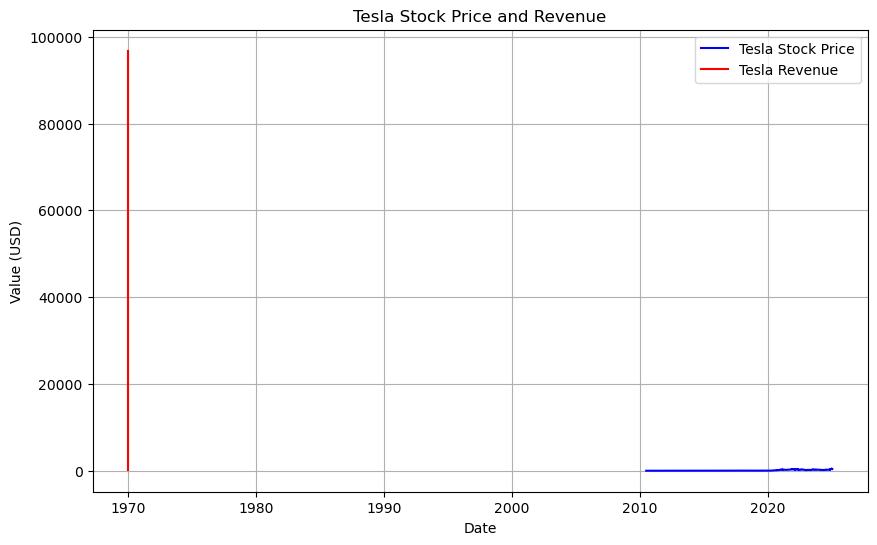

In [24]:

# Question 5: Plot Tesla Stock and Revenue
print("\n=== Question 5: Plot Tesla Stock and Revenue ===")
make_graph(tesla_data, tesla_revenue, "Tesla")




=== Question 6: Plot GameStop Stock and Revenue ===


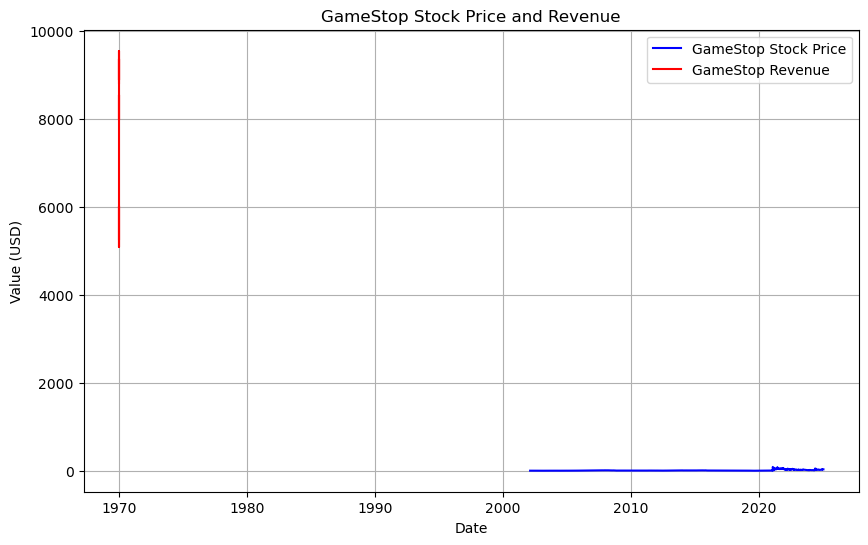

In [25]:
# Question 6: Plot GameStop Stock and Revenue
print("\n=== Question 6: Plot GameStop Stock and Revenue ===")
make_graph(gme_data, gme_revenue, "GameStop")
